**Assalamualaikum, Ma'am. My name is Aiyub Ali & ID no. is 193-15-13456 from section D. My lab task will be available also on my GitHub. If you would like to see my work on Github as up-to-date, please [Click](https://github.com/mdaiyub/Data_Mining_Lab) on this. This work aims to start with several classifiers after that I would like to compare the applied classifier which one of the best of them. Thank you!**

# **Importing the Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, f1_score,recall_score, precision_score

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mdaiyub/Data_Mining_Lab/main/Dataset/Iris.csv")
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
df.drop('Id', axis = 1)
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [ ]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Exploratory Data Analysis (EDA)**

In [ ]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

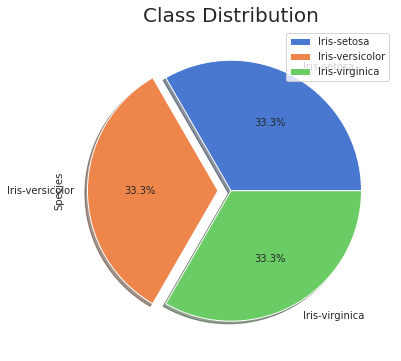

In [ ]:
plt.figure(figsize = (13,6))
df["Species"].value_counts().plot.pie(explode = [0, 0.1, 0], autopct = "%1.1f%%", shadow = True )
plt.title("Class Distribution", fontsize = 20)
plt.legend(["Iris-setosa", "Iris-versicolor","Iris-virginica"])
plt.show()

It refers to an analysis involving multiple dependent variables resulting in one outcome. Creating different graphs for all the features to perform bivariate analysis would be extremely tedious. Seaborn provides a convenient way to perform multivariate analysis using the pairplot function.

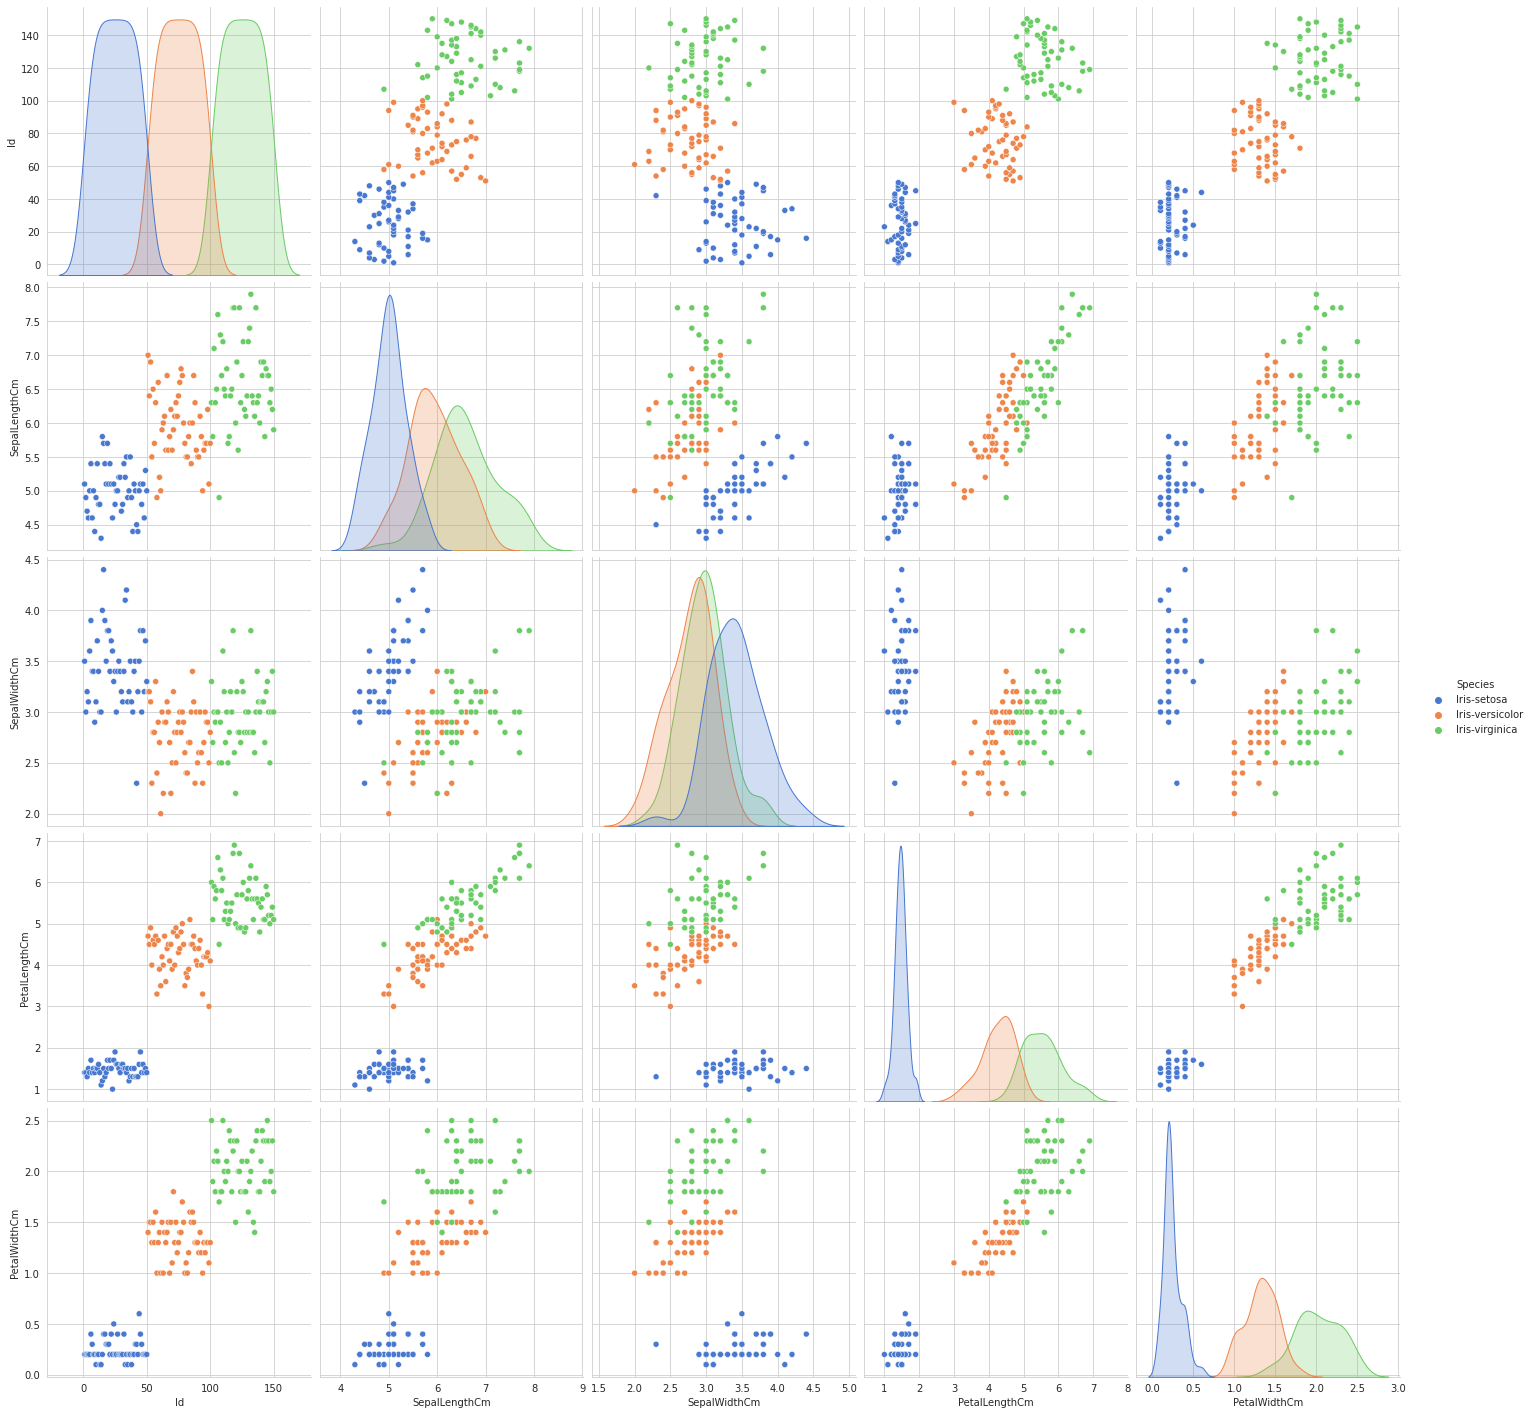

In [ ]:
sns.pairplot(df, hue = "Species", height = 4)

# **Data Preprocessing**

In [ ]:
X = df.drop('Species', axis = 1)
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)

In [ ]:
le=LabelEncoder()
y = le.fit_transform(df['Species'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

# **K-Nearest Neighbors(KNN) Model**




In [ ]:
k_list = list(range(1,50,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

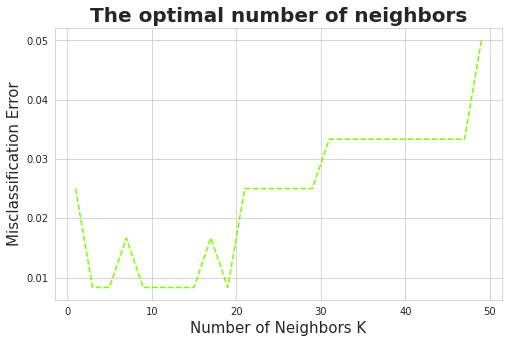

In [ ]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(8,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE, linestyle = '--', color = '#7CFC00')

plt.show()

In [ ]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc_knn = knn.score(X_test, y_test)
print("The accuracy for KNN is:", acc_knn * 100, "%")
print(classification_report(y_test, knn_pred))

The accuracy for KNN is: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



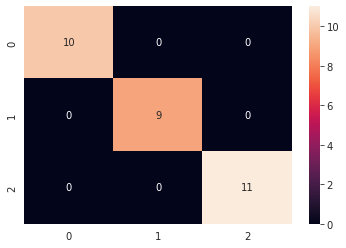

In [ ]:
sns.heatmap(confusion_matrix(y_test,knn_pred), annot= True, fmt= 'g')

# **Decision Tree Model**

In [ ]:
dtr = DecisionTreeClassifier(criterion = 'entropy',random_state = 40)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
acc_dtr = dtr.score(X_test, y_test)
print("The accuracy for Decision Tree is:", acc_dtr * 100, "%")
print(classification_report(y_test, dtr_pred))

The accuracy for Decision Tree is: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



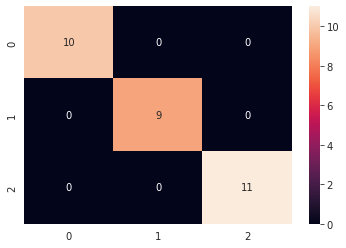

In [ ]:
sns.heatmap(confusion_matrix(y_test,dtr_pred), annot= True, fmt= 'g')

# **Naive bayes Model**

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
acc_nb = nb.score(X_test, y_test)
print("The accuracy for Naive bayes is:", acc_nb * 100, "%")
print(classification_report(y_test, nb_pred))

The accuracy for Naive bayes is: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



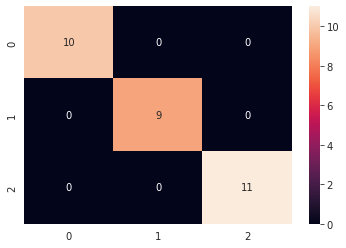

In [ ]:
sns.heatmap(confusion_matrix(y_test,nb_pred), annot= True, fmt= 'g')

# **Thank you,Ma'am, for watching till the end!**